In [1]:
# Adapted from: "https://www.machinelearningplus.com/time-series/time-series-analysis-python/"

from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [3]:
indicesExcel = pd.ExcelFile("Transfomed indices.xlsx")

indicators = ['CDD', 'CWD', 'PRCPTOT', 'R10mm', 'R20mm', 'R30mm',
              'Rx1day', 'Rx3day', 'Rx5day', 'DRT', 'SU', 'Tnm',
              'Tmm', 'Txm', 'Txn','Txx', 'Tnn', 'Tnx', 'TR', 'TN10p',
              'Tx10p', 'Tx90p', 'tmge5', 'tmge10','Tn90p', 'Txge30',
              'Txge35', 'Txgt50p']

In [3]:
dataFrame = pd.read_excel(indicesExcel, sheet_name='Barisal', parse_dates=[['Year', 'Month']], index_col='Year_Month')
dataFrame.head()

,CDD,CWD,PRCPTOT,R10mm,R20mm,R30mm,Rx1day,Rx3day,Rx5day,DRT,...,TR,TN10p,Tx10p,Tx90p,tmge5,tmge10,Tn90p,Txge30,Txge35,Txgt50p
Year_Month,,,,,,,,,,,,,,,,,,,,,
1980-01-01,47,0,0,0,0,0,0,0,0,13.75,...,0,12.90,9.52,12.74,30,30,12.26,0,0,49.52
1980-02-01,35,3,55,3,0,0,18,28,40,13.89,...,2,20.69,17.07,0.00,29,29,13.79,9,0,45.86
1980-03-01,18,2,47,2,1,0,25,40,40,12.32,...,10,12.58,11.94,0.00,30,30,3.23,24,0,32.90
1980-04-01,12,1,13,0,0,0,7,9,9,9.44,...,29,3.33,0.00,12.50,28,28,32.00,28,11,88.00
1980-05-01,8,7,235,9,4,2,45,70,88,9.03,...,29,12.90,11.29,2.90,30,30,8.39,28,5,46.94


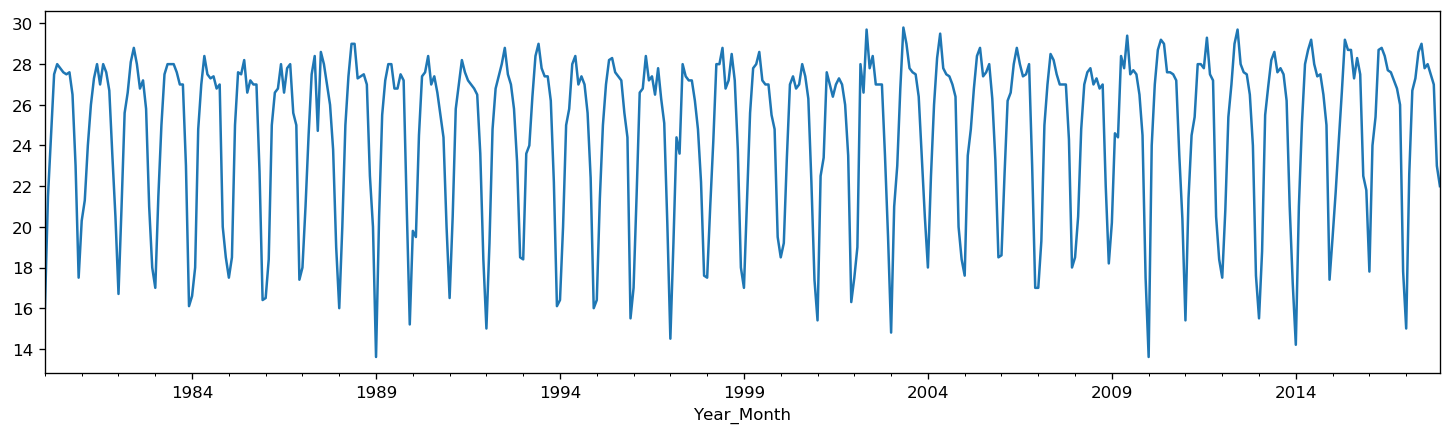

In [4]:
Tnx = dataFrame['Tnx']
Tnx.plot(figsize=(15,4))
plt.show()

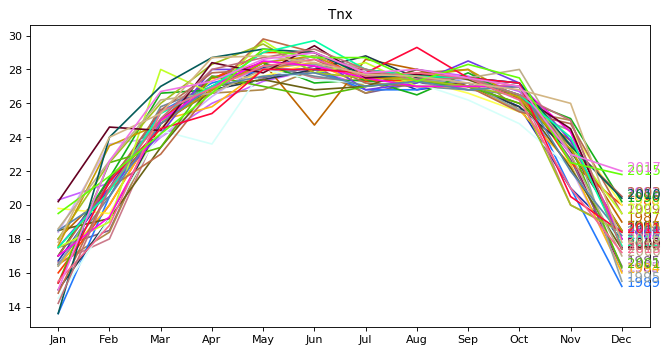

In [4]:
# Time serise seasonal plot

df = pd.read_excel(indicesExcel, sheet_name='Barisal', parse_dates=[['Year', 'Month']], index_col='Year_Month')
df.reset_index(inplace=True)

df['year'] = [d.year for d in df.Year_Month]  # "https://blog.teamtreehouse.com/python-single-line-loops"
df['month'] = [d.strftime('%b') for d in df.Year_Month] # "https://www.programiz.com/python-programming/datetime/strftime"
years = df['year'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# indices selection
indc = 'Tnx'

# for indc in indicators:
# Draw Plot
plt.figure(figsize=(10,5), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', indc, data=df.loc[df.year==y, :], color=mycolors[i], label=y, )
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, indc][-1:].values[0], y, fontsize=12, color=mycolors[i])
plt.title(indc)
plt.show()


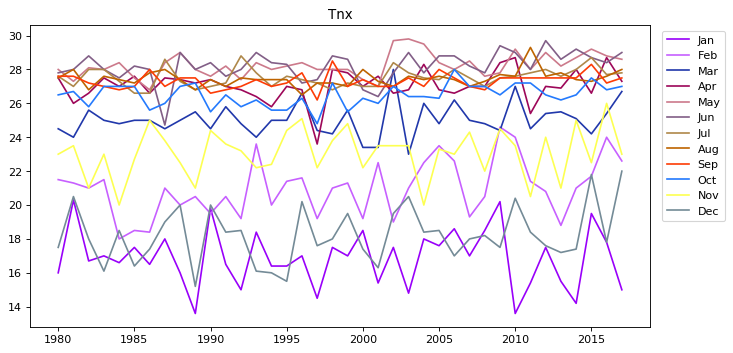

In [5]:
# Time serise seasonal plot

df = pd.read_excel(indicesExcel, sheet_name='Barisal', parse_dates=[['Year', 'Month']], index_col='Year_Month')
df.reset_index(inplace=True)

df['year'] = [d.year for d in df.Year_Month]  # "https://blog.teamtreehouse.com/python-single-line-loops"
df['month'] = [d.strftime('%b') for d in df.Year_Month] # "https://www.programiz.com/python-programming/datetime/strftime"
months = df['month'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(months), replace=False)

# indices selection
indc = 'Tnx'

# for indc in indicators:
# Draw Plot
plt.figure(figsize=(10,5), dpi= 80)
for i, m in enumerate(months):
    if i >= 0:        
        plt.plot('year', indc, data=df.loc[df.month==m, :], color=mycolors[i], label=m)
plt.title(indc)
plt.legend(bbox_to_anchor=(1.13, 1), loc='upper right')
plt.show()

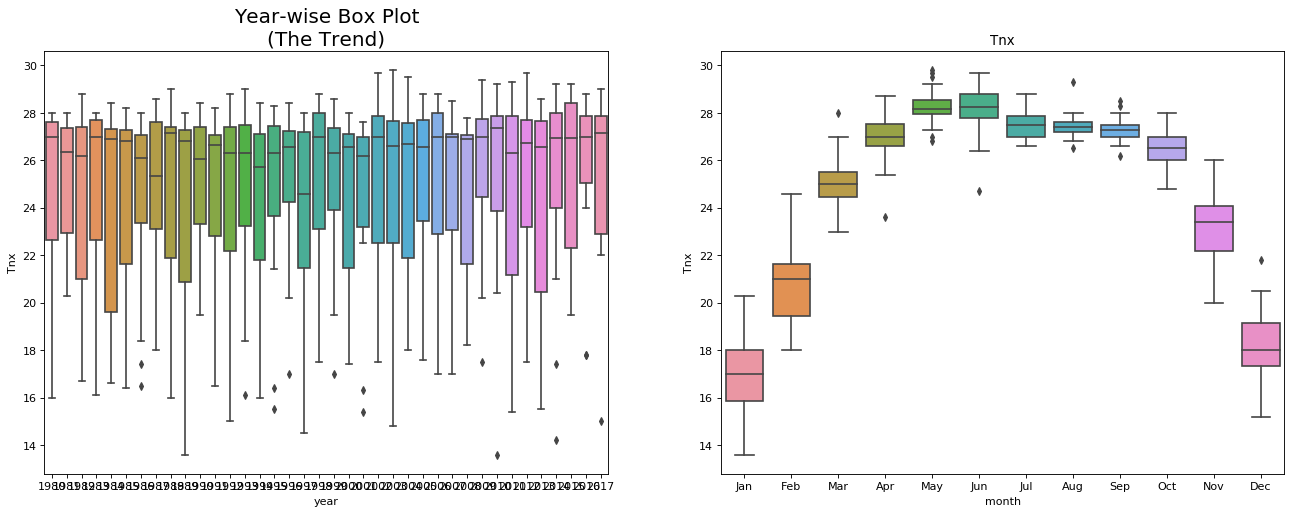

In [7]:
# Import Data
df = pd.read_excel(indicesExcel, sheet_name='Barisal', parse_dates=[['Year', 'Month']], index_col='Year_Month')
df.reset_index(inplace=True)

df['year'] = [d.year for d in df.Year_Month]
df['month'] = [d.strftime('%b') for d in df.Year_Month]
years = df['year'].unique()

# indices selection
indc = 'Tnx'

# for indc in indicators:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y=indc, data=df, ax=axes[0])
sns.boxplot(x='month', y=indc, data=df.loc[~df.year.isin([1980, 2017]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.title(indc)
plt.show()

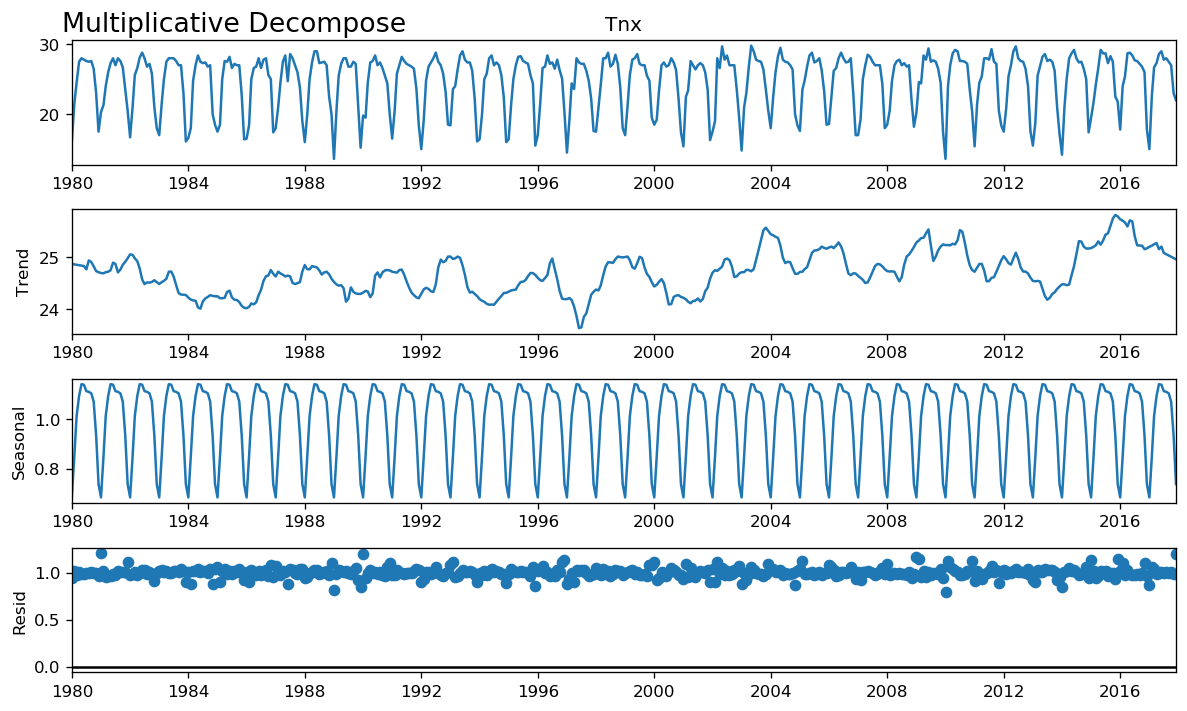

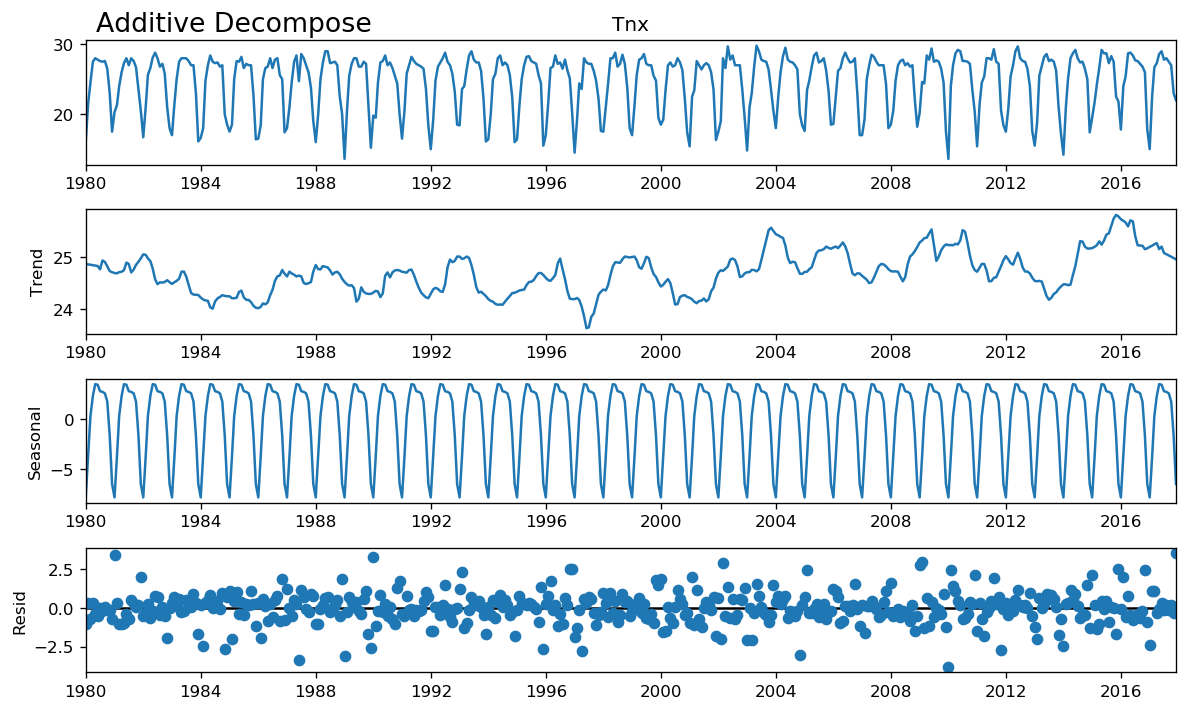

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

df = pd.read_excel(indicesExcel, sheet_name='Barisal', parse_dates=[['Year', 'Month']], index_col='Year_Month')

# indices selection
indc = 'Tnx'

# Multiplicative Decomposition 
result_mul = seasonal_decompose(df[indc], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df[indc], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,6)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=16, x=0.2)
result_add.plot().suptitle('Additive Decompose', fontsize=16, x=0.2)
plt.show()

In [9]:
# Extract the Components ----
# Actual Values = Product of (Seasonal * Trend * Resid)
df_reconstructed = pd.concat([result_mul.seasonal, result_mul.trend, result_mul.resid, result_mul.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

,seas,trend,resid,actual_values
Year_Month,,,,
1980-01-01,0.682954,24.866812,0.942124,16.0
1980-02-01,0.849390,24.858829,1.018241,21.5
1980-03-01,1.013578,24.850845,0.972675,24.5
1980-04-01,1.095127,24.842861,1.010803,27.5
1980-05-01,1.142976,24.834878,0.986413,28.0


In [10]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(df.Tnx.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(df.Tnx.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -3.621168997307733
p-value: 0.005368982425364462
Critial Values:
   1%, -3.445231637930579
Critial Values:
   5%, -2.8681012763264233
Critial Values:
   10%, -2.5702649212751583

KPSS Statistic: 0.246018
p-value: 0.100000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1661: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


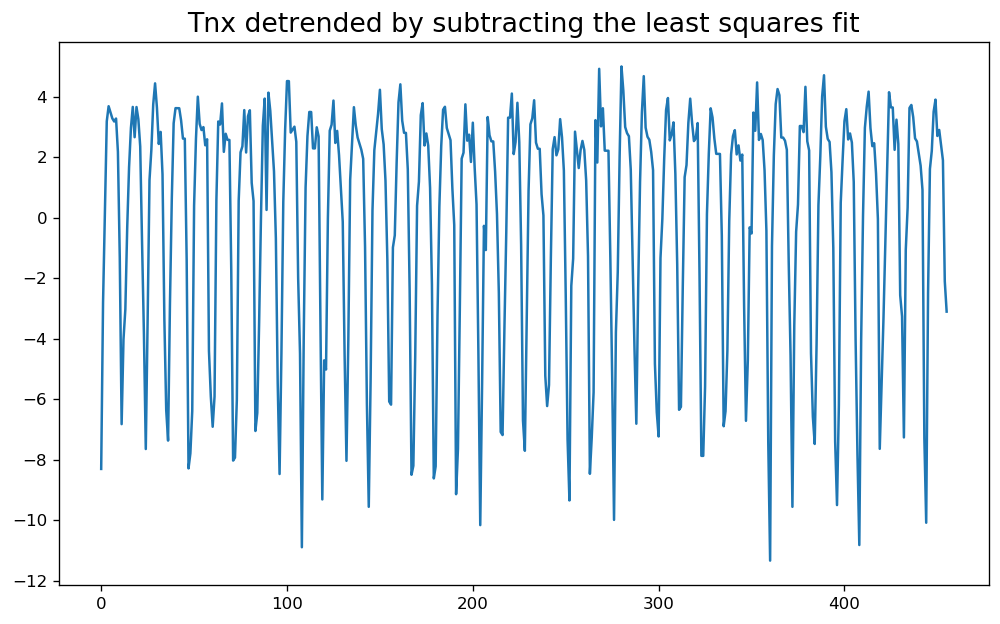

In [11]:
# Using scipy: Subtract the line of best fit
from scipy import signal

df = pd.read_excel(indicesExcel, sheet_name='Barisal', parse_dates=[['Year', 'Month']], index_col='Year_Month')

detrended = signal.detrend(df.Tnx.values)
plt.plot(detrended)
plt.title('Tnx detrended by subtracting the least squares fit', fontsize=16)
plt.show()

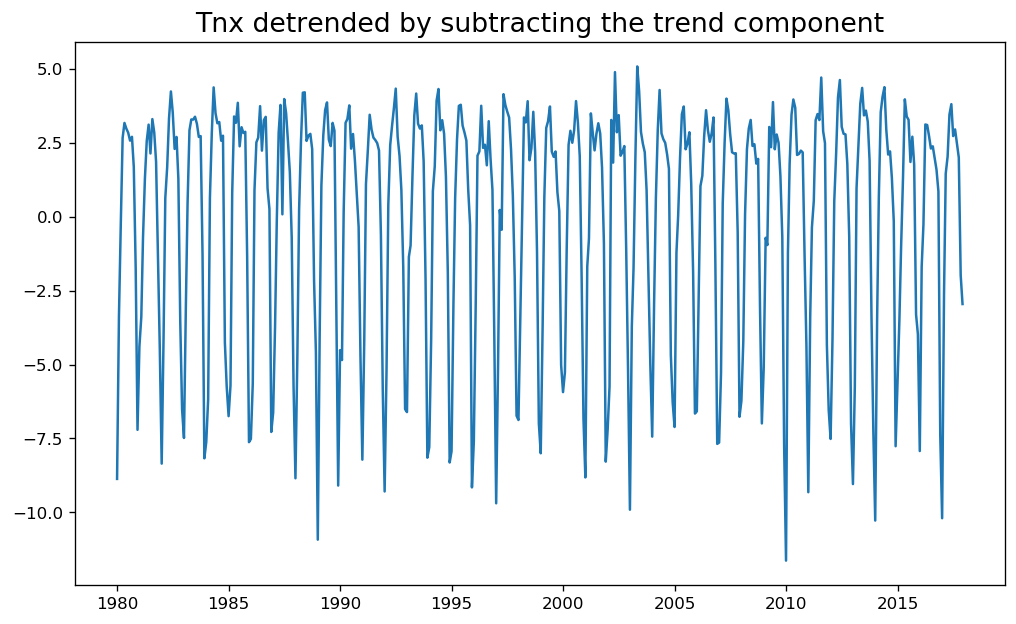

In [12]:
# Using statmodels: Subtracting the Trend Component.
from statsmodels.tsa.seasonal import seasonal_decompose

df = pd.read_excel(indicesExcel, sheet_name='Barisal', parse_dates=[['Year', 'Month']], index_col='Year_Month')

result_mul = seasonal_decompose(df['Tnx'], model='multiplicative', extrapolate_trend='freq')
detrended = df.Tnx.values - result_mul.trend
plt.plot(detrended)
plt.title('Tnx detrended by subtracting the trend component', fontsize=16)
plt.show()

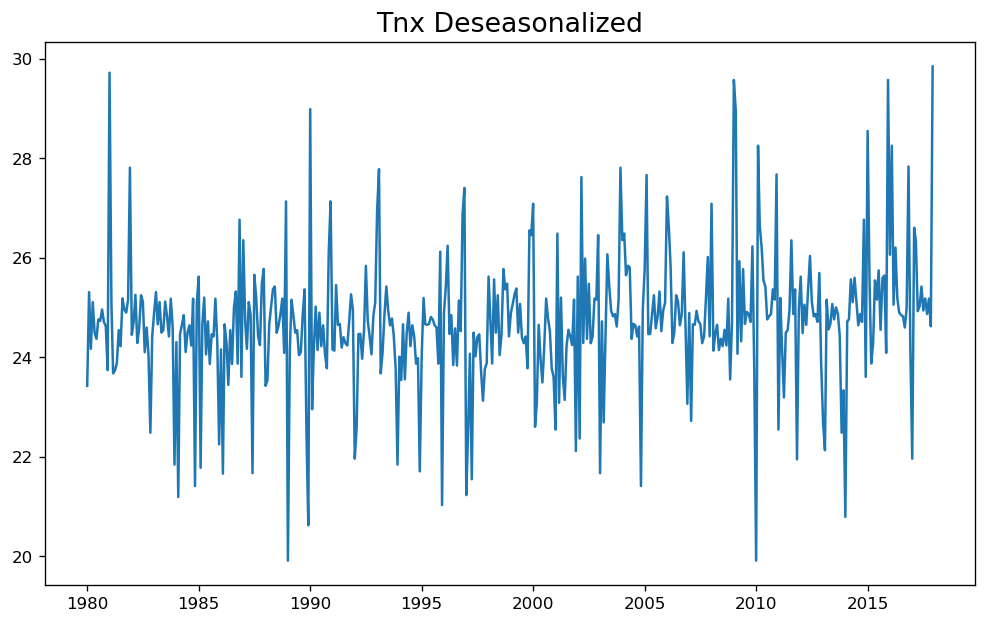

In [13]:
# Subtracting the Trend Component.
df = pd.read_excel(indicesExcel, sheet_name='Barisal', parse_dates=[['Year', 'Month']], index_col='Year_Month')
# Time Series Decomposition
result_mul = seasonal_decompose(df['Tnx'], model='multiplicative', extrapolate_trend='freq')

# Deseasonalize
deseasonalized = df.Tnx.values / result_mul.seasonal

# Plot
plt.plot(deseasonalized)
plt.title('Tnx Deseasonalized', fontsize=16)
plt.plot()
plt.show()

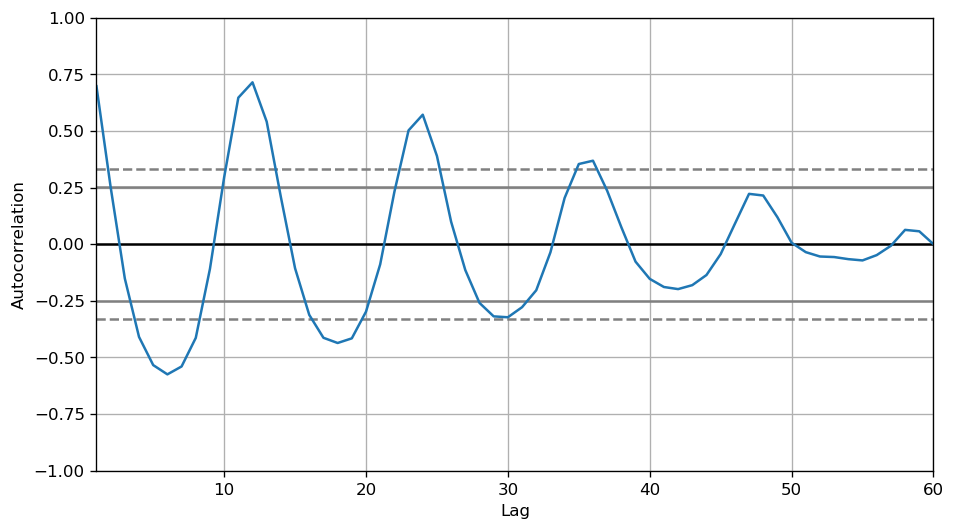

In [14]:
from pandas.plotting import autocorrelation_plot
df = pd.read_excel(indicesExcel, sheet_name='Barisal', parse_dates=[['Year', 'Month']], index_col='Year_Month')

# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df.Tnx[0:60].tolist())
plt.show()

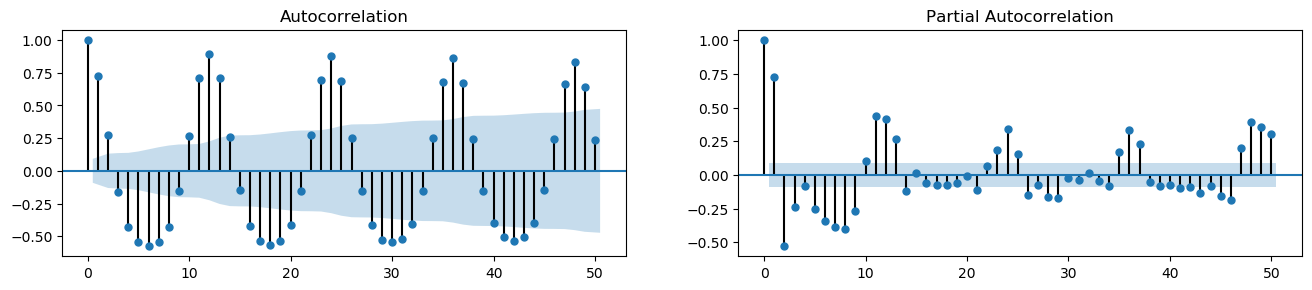

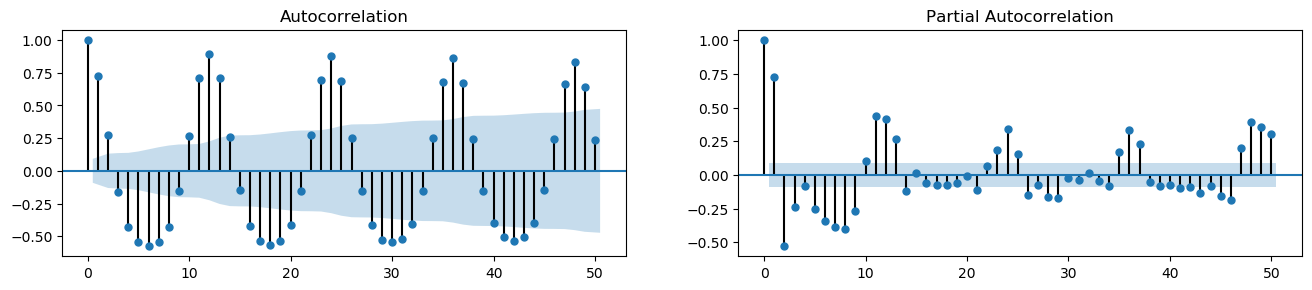

In [15]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

df = pd.read_excel(indicesExcel, sheet_name='Barisal', parse_dates=[['Year', 'Month']], index_col='Year_Month')

# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.Tnx, nlags=50)
# pacf_50 = pacf(df.Tnx, nlags=50)

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df.Tnx.tolist(), lags=50, ax=axes[0])
plot_pacf(df.Tnx.tolist(), lags=50, ax=axes[1])

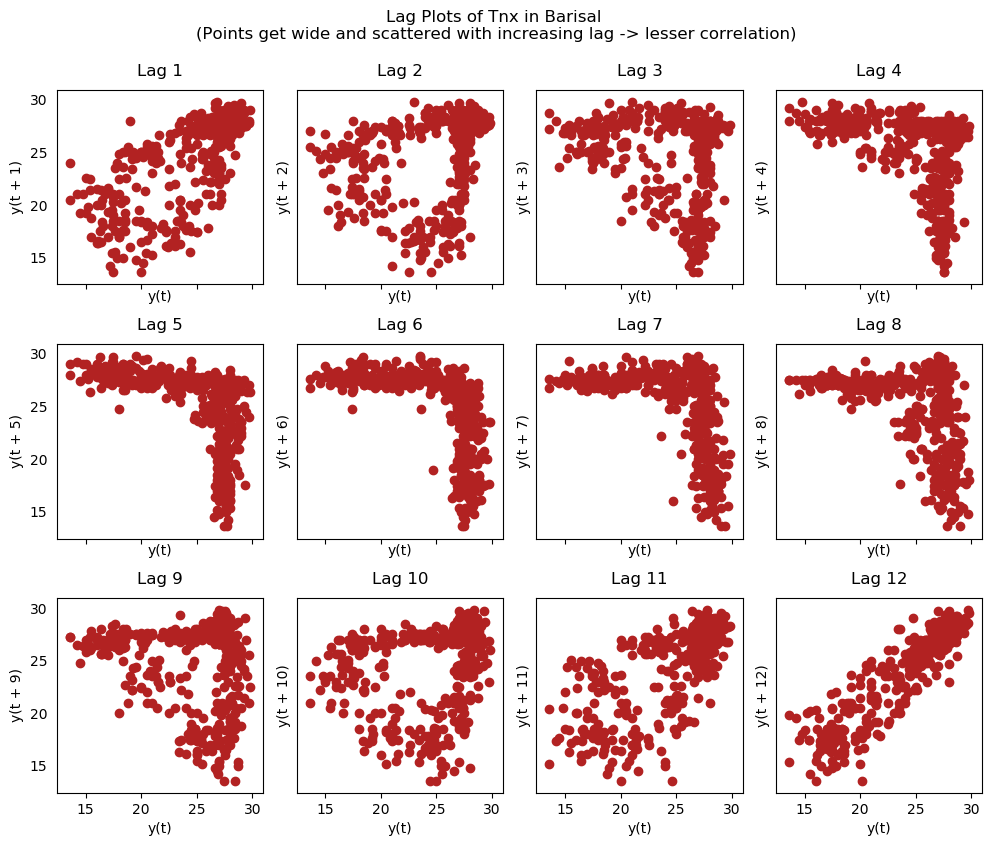

In [16]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

# Import
df = pd.read_excel(indicesExcel, sheet_name='Barisal', parse_dates=[['Year', 'Month']], index_col='Year_Month')


# Plot
fig, axes = plt.subplots(3, 4, figsize=(10,8), sharex=True, sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:]):
    lag_plot(df.Tnx, lag=i+1, ax=ax, c='firebrick')
    ax.set_title('Lag ' + str(i+1))

fig.tight_layout(pad=1)
fig.suptitle('Lag Plots of Tnx in Barisal \n(Points get wide and scattered with increasing lag -> lesser correlation)\n', y=1.05)    
 
plt.show()

In [17]:
# https://en.wikipedia.org/wiki/Approximate_entropy
df = pd.read_excel(indicesExcel, sheet_name='Barisal', parse_dates=[['Year', 'Month']], index_col='Year_Month')

def ApEn(U, m, r):
    """Compute Aproximate entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))

    N = len(U)
    return abs(_phi(m+1) - _phi(m))

print(ApEn(df.Tnx, m=2, r=0.2*np.std(df.Tnx)))     # 0.868

0.8687336955064695


In [18]:
# https://en.wikipedia.org/wiki/Sample_entropy
df = pd.read_excel(indicesExcel, sheet_name='Barisal', parse_dates=[['Year', 'Month']], index_col='Year_Month')

def SampEn(U, m, r):
    """Compute Sample entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for j in range(len(x)) if i != j and _maxdist(x[i], x[j]) <= r]) for i in range(len(x))]
        return sum(C)

    N = len(U)
    return -np.log(_phi(m+1) / _phi(m))

print(SampEn(df.Tnx, m=2, r=0.2*np.std(df.Tnx)))      # 0.862

0.8629621020381414


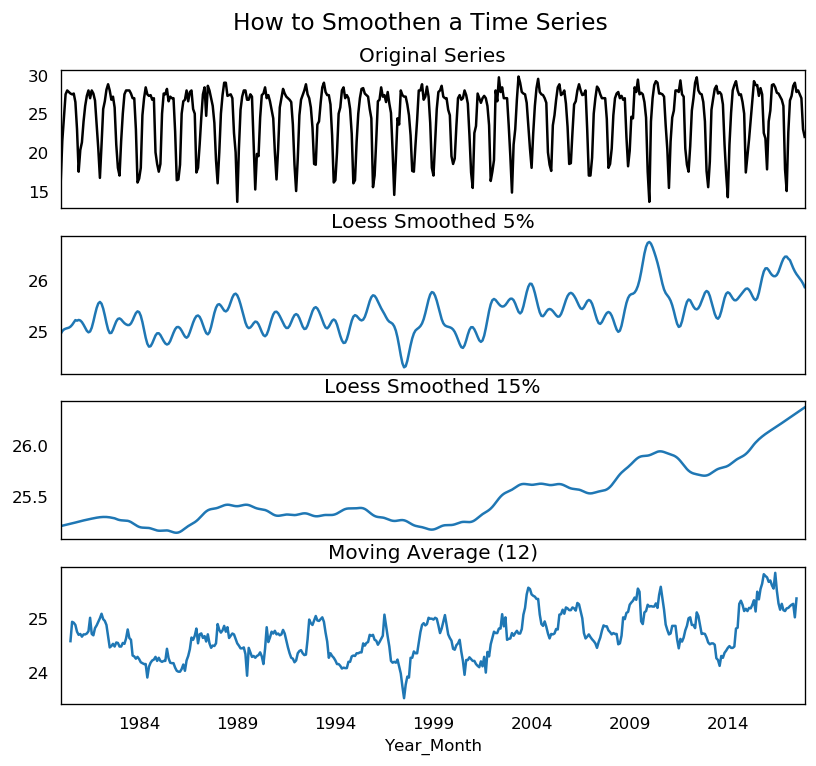

In [19]:
from statsmodels.nonparametric.smoothers_lowess import lowess
plt.rcParams.update({'xtick.bottom' : False, 'axes.titlepad':5})

# Import
df_orig = pd.read_excel(indicesExcel, sheet_name='Barisal', parse_dates=[['Year', 'Month']], index_col='Year_Month')

# 1. Moving Average
df_ma = df_orig.Tnx.rolling(12, center=True, closed='both').mean()

# 2. Loess Smoothing (5% and 15%)
df_loess_5 = pd.DataFrame(lowess(df_orig.Tnx, np.arange(len(df_orig.Tnx)), frac=0.05)[:, 1], index=df_orig.index, columns=['Tnx'])
df_loess_15 = pd.DataFrame(lowess(df_orig.Tnx, np.arange(len(df_orig.Tnx)), frac=0.15)[:, 1], index=df_orig.index, columns=['Tnx'])

# Plot
fig, axes = plt.subplots(4,1, figsize=(8, 7), sharex=True, dpi=120)
df_orig['Tnx'].plot(ax=axes[0], color='k', title='Original Series')
df_loess_5['Tnx'].plot(ax=axes[1], title='Loess Smoothed 5%')
df_loess_15['Tnx'].plot(ax=axes[2], title='Loess Smoothed 15%')
df_ma.plot(ax=axes[3], title='Moving Average (12)')
fig.suptitle('How to Smoothen a Time Series', y=0.95, fontsize=14)
plt.show()

In [20]:
# Test if one exogenous variable is suitable for prediction

from statsmodels.tsa.stattools import grangercausalitytests
df = pd.read_excel(indicesExcel, sheet_name='Barisal', parse_dates=[['Year', 'Month']])
df['month'] = df.Year_Month.dt.month
grangercausalitytests(df[['Tnx', 'month']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=713.8946, p=0.0000  , df_denom=452, df_num=1
ssr based chi2 test:   chi2=718.6328, p=0.0000  , df=1
likelihood ratio test: chi2=431.1406, p=0.0000  , df=1
parameter F test:         F=713.8946, p=0.0000  , df_denom=452, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=244.4584, p=0.0000  , df_denom=449, df_num=2
ssr based chi2 test:   chi2=494.3612, p=0.0000  , df=2
likelihood ratio test: chi2=334.4338, p=0.0000  , df=2
parameter F test:         F=244.4584, p=0.0000  , df_denom=449, df_num=2


{1: ({'ssr_ftest': (713.8945679845169, 4.7460127219468425e-95, 452.0, 1),
   'ssr_chi2test': (718.6328062676, 2.6543192532628e-158, 1),
   'lrtest': (431.1406012646512, 9.175654095884348e-96, 1),
   'params_ftest': (713.894567984517, 4.7460127219468425e-95, 452.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (244.4583657117963, 1.5080715959222234e-72, 449.0, 2),
   'ssr_chi2test': (494.3612384550357, 4.4752884862008e-108, 2),
   'lrtest': (334.4337813236907, 2.3912616811596168e-73, 2),
   'params_ftest': (244.45836571179677, 1.5080715959219233e-72, 449.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

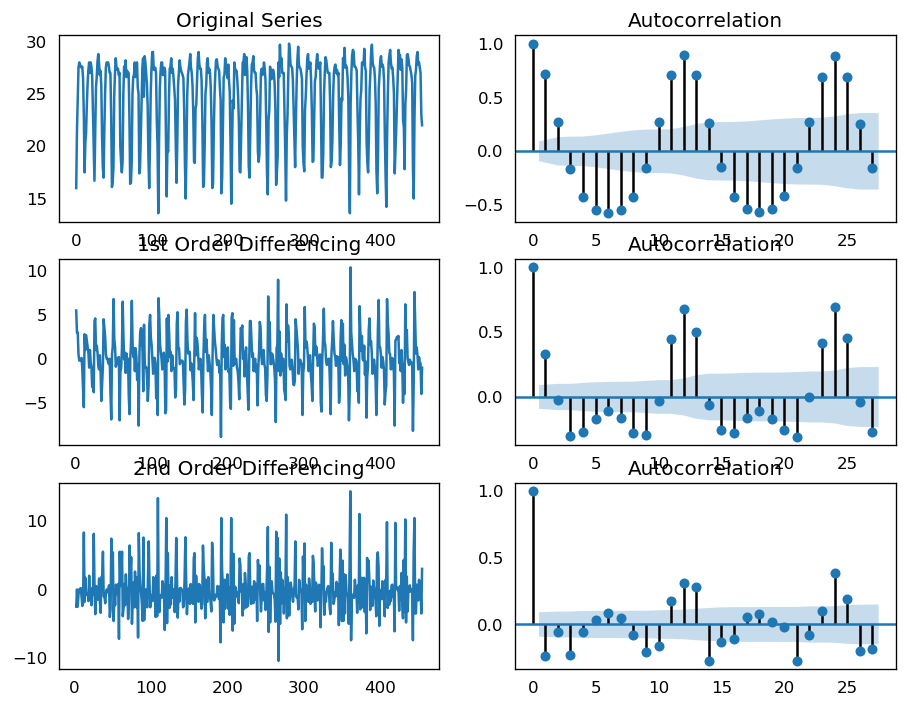

In [21]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
df = pd.read_excel(indicesExcel, sheet_name='Barisal', parse_dates=[['Year', 'Month']])

# Original Series
fig, axes = plt.subplots(3, 2)
axes[0, 0].plot(df.Tnx); axes[0, 0].set_title('Original Series')
plot_acf(df.Tnx, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.Tnx.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.Tnx.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.Tnx.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.Tnx.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

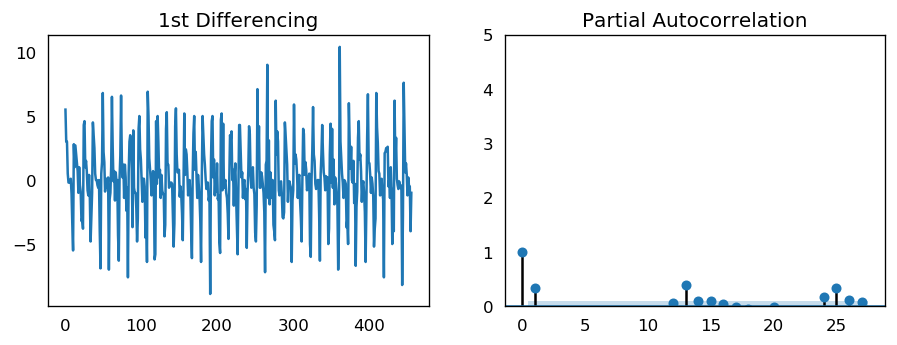

In [22]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2)
axes[0].plot(df.Tnx.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.Tnx.diff().dropna(), ax=axes[1])

plt.show()

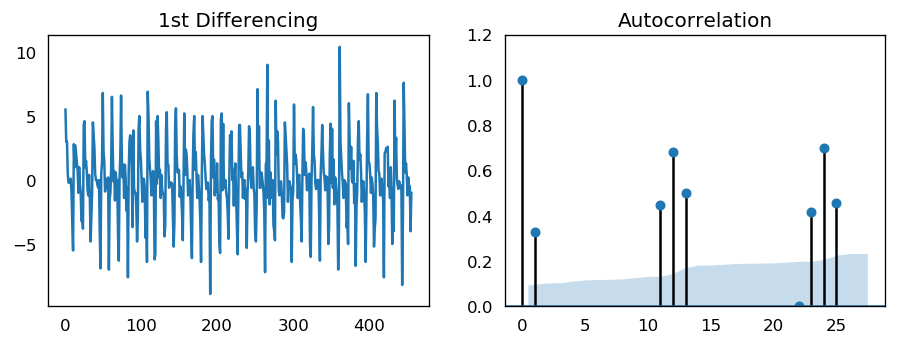

In [23]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

# Import data
df = pd.read_excel(indicesExcel, sheet_name='Barisal', parse_dates=[['Year', 'Month']])

fig, axes = plt.subplots(1, 2)
axes[0].plot(df.Tnx.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.Tnx.diff().dropna(), ax=axes[1])

plt.show()

In [24]:
from statsmodels.tsa.arima_model import ARIMA

# 0,1,1 ARIMA Model
model = ARIMA(df.Tnx, order=(0,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.Tnx   No. Observations:                  455
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1109.485
Method:                       css-mle   S.D. of innovations              2.771
Date:                Tue, 22 Sep 2020   AIC                           2224.970
Time:                        15:38:45   BIC                           2237.331
Sample:                             1   HQIC                          2229.839
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0167      0.171      0.098      0.922      -0.319       0.352
ma.L1.D.Tnx     0.3176      0.039      8.186      0.000       0.242       0.394
                                    Roots       

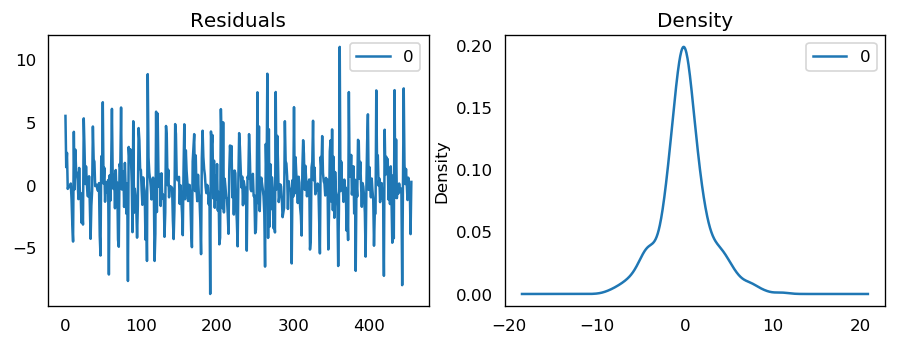

In [25]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

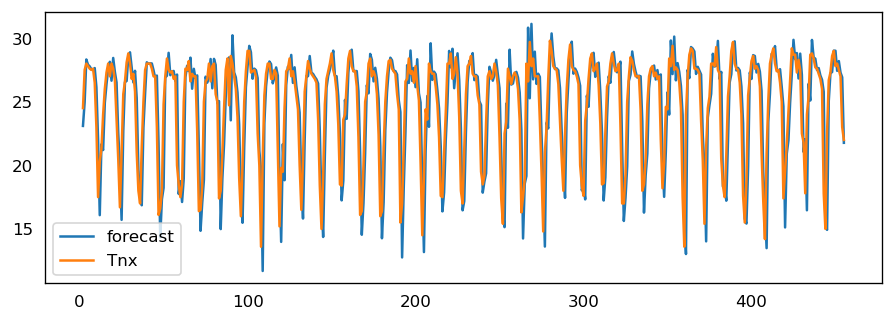

In [26]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

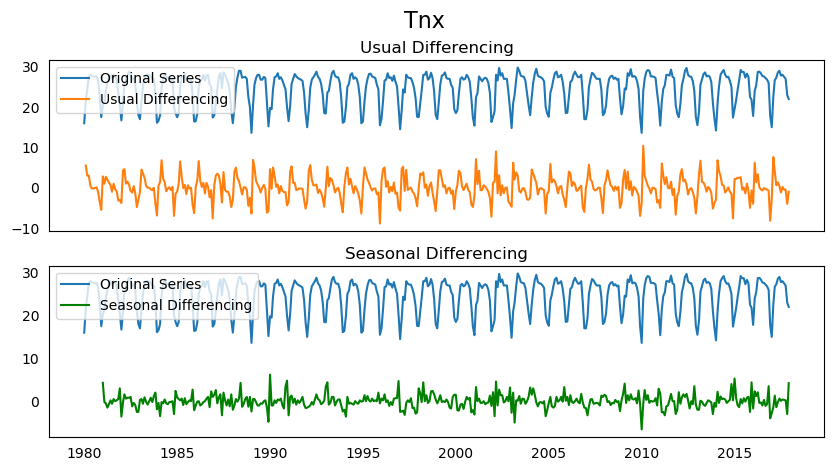

In [27]:
# Import
data = pd.read_excel(indicesExcel, sheet_name='Barisal', parse_dates=[['Year', 'Month']], index_col='Year_Month')

data = data.Tnx

# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data[:], label='Original Series')
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('Tnx', fontsize=16)
plt.show()

In [29]:
# !pip3 install pyramid-arima
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=3.81 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1689.280, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1553.646, Time=0.52 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=2.64 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1687.358, Time=0.05 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1691.272, Time=0.12 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1497.801, Time=1.50 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=3.60 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.57 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=1495.984, Time=1.21 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1552.486, Time=0.42 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=2.92 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.57 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=1497.829, Time=0.97 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=1498.4

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                  456
Model:             SARIMAX(2, 1, 0, 12)   Log Likelihood                -744.228
Date:                  Tue, 22 Sep 2020   AIC                           1494.456
Time:                          15:40:38   BIC                           1506.744
Sample:                               0   HQIC                          1499.302
                                  - 456                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.7086      0.036    -19.599      0.000      -0.779      -0.638
ar.S.L24      -0.3604      0.035    -10.208      0.000      -0.430      -0.291
sigma2         1.6461      0.083     19.782      0.000       1.483       1.809
===================================================================================
Ljung-Box (Q):                      115.53   Jarque-Bera (JB):                49.86
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.27   Skew:                             0.18
Prob(H) (two-sided):                  0.14   Kurtosis:                         4.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""